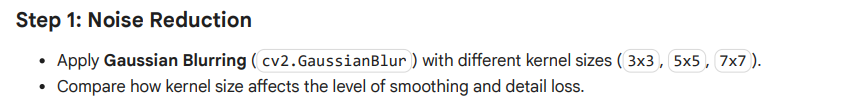

#Gaussian Blur:
1.Gaussian Blur is an image smoothing technique that uses a Gaussian function (bell-shaped curve) to calculate a weighted average of surrounding pixels.

2.It replaces each pixel’s value with the weighted average of its neighboring pixels, giving more importance (weight) to pixels that are closer to the center.

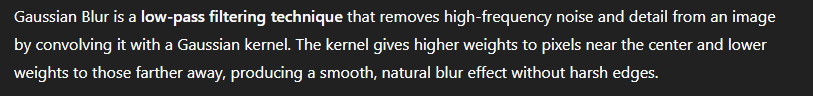

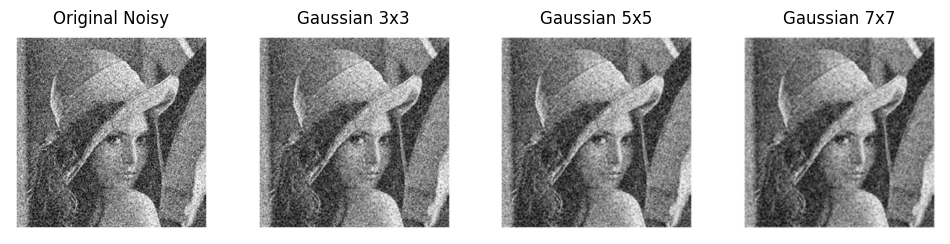

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load noisy grayscale image
img = cv2.imread("Image-affected-by-Gaussian-noise.png", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur with different kernel sizes
gauss3 = cv2.GaussianBlur(img, (3,3), 0)
gauss5 = cv2.GaussianBlur(img, (5,5), 0)
gauss7 = cv2.GaussianBlur(img, (7,7), 0)

# Display results
titles = ["Original Noisy", "Gaussian 3x3", "Gaussian 5x5", "Gaussian 7x7"]
images = [img, gauss3, gauss5, gauss7]

plt.figure(figsize=(12,6))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
plt.show()


#Output Observation:
The first figure displays four images: the noisy original and three blurred versions using 3×3, 5×5, and 7×7 kernels. As the kernel size increases, the image becomes smoother and noise visibly decreases. However, fine details such as edges and textures become softer at higher kernel sizes.

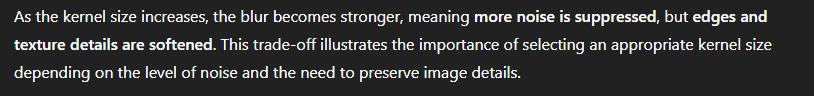

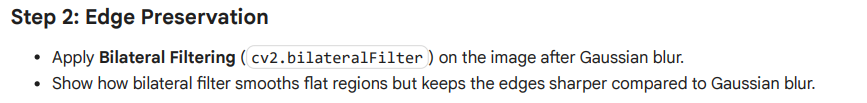

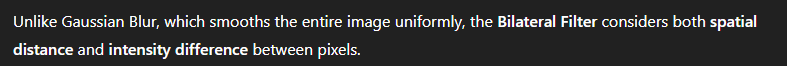

#Sigma Colour:

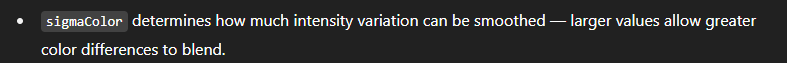

#Sigma Space:

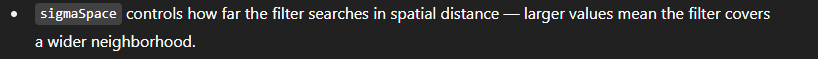

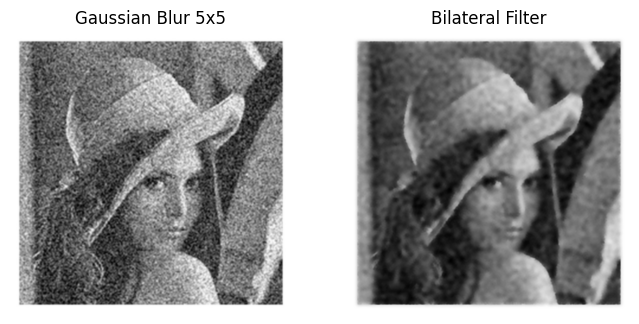

In [ ]:
# Apply Bilateral Filter after Gaussian blur (choose best kernel, e.g. 5x5)
bilateral = cv2.bilateralFilter(gauss5, d=15, sigmaColor=75, sigmaSpace=75)

#d=15 means 15 X 15 neighbourhood pixel values.

# Display
plt.figure(figsize=(8,4))
plt.subplot(1,2,1), plt.imshow(gauss5, cmap="gray"), plt.title("Gaussian Blur 5x5"), plt.axis("off")
plt.subplot(1,2,2), plt.imshow(bilateral, cmap="gray"), plt.title("Bilateral Filter"), plt.axis("off")
plt.show()


#Output Observation:

1.The Bilateral filter smooths textures and removes noise while preserving edge sharpness.

2.It overcomes Gaussian blur’s weakness of blurring edges.

3.The output proves that Bilateral Filtering is ideal for denoising images without losing important edge information.

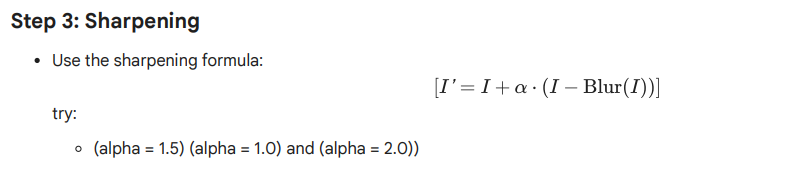

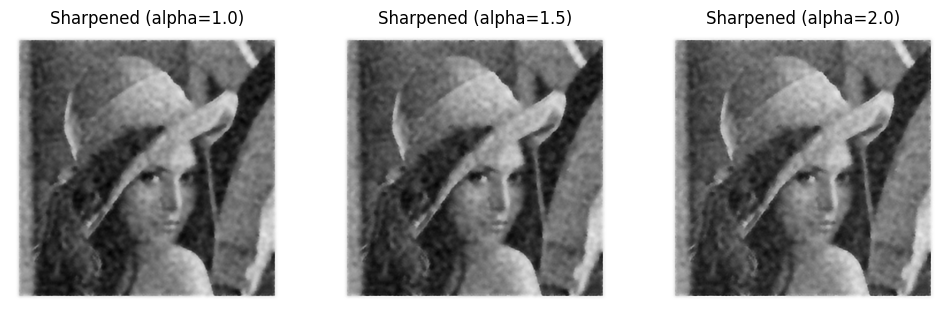

In [ ]:
import numpy as np

# Blur for sharpening formula
blurred = cv2.GaussianBlur(bilateral, (5,5), 0)

# Sharpening with different alpha values
alpha_values = [1.0, 1.5, 2.0]
sharpened_images = []

for alpha in alpha_values:
    sharpened = cv2.addWeighted(bilateral, 1+alpha, blurred, -alpha, 0)
    sharpened_images.append(sharpened)

# Display
plt.figure(figsize=(12,4))
for i, alpha in enumerate(alpha_values):
    plt.subplot(1,3,i+1)
    plt.imshow(sharpened_images[i], cmap="gray")
    plt.title(f"Sharpened (alpha={alpha})")
    plt.axis("off")
plt.show()


#Explanation:
1.Sharpening was performed using the weighted addition method with varying alpha values (1.0, 1.5, and 2.0).

2.The technique enhances high-frequency details by combining the original and blurred images.

3.Increasing alpha intensifies the contrast between edges, making textures and details more prominent.

4.Through visual comparison, the image sharpened at alpha = 1.5 achieved the best balance between clarity and natural appearance.

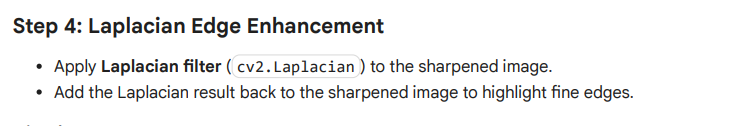

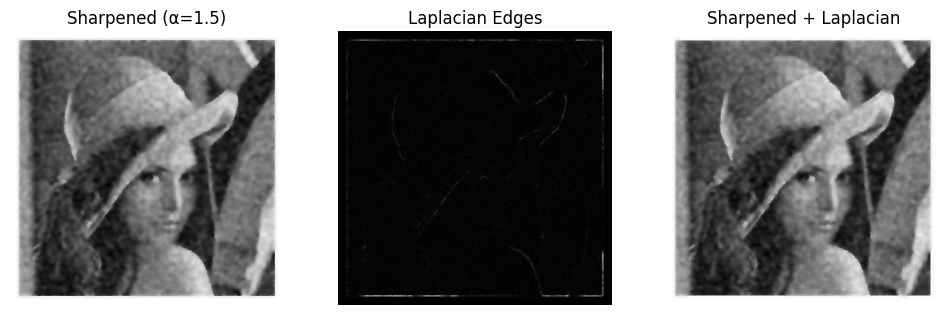

In [ ]:
# Apply Laplacian on best sharpened image (alpha=1.5 as example)
best_sharp = sharpened_images[1]

laplacian = cv2.Laplacian(best_sharp, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

# Add Laplacian back to sharpened image
final_output = cv2.addWeighted(best_sharp, 1, laplacian, 1, 0)

# Display
plt.figure(figsize=(12,4))
plt.subplot(1,3,1), plt.imshow(best_sharp, cmap="gray"), plt.title("Sharpened (α=1.5)"), plt.axis("off")
plt.subplot(1,3,2), plt.imshow(laplacian, cmap="gray"), plt.title("Laplacian Edges"), plt.axis("off")
plt.subplot(1,3,3), plt.imshow(final_output, cmap="gray"), plt.title("Sharpened + Laplacian"), plt.axis("off")
plt.show()


#Mathematical Formula:

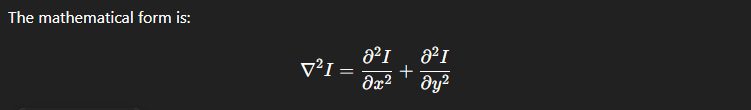

#Logical Reasoning

1.The Laplacian emphasizes high-frequency components, mainly edges.

2.When added back to the original or sharpened image, these highlighted edges increase overall contrast and make boundaries clearer.

3.This is often the final step after smoothing and sharpening — it polishes the image, making it look crisp and refined.

#Conclusion

1.Gaussian Blur reduced noise but softened details.

2.Bilateral Filtering maintained edge clarity while removing noise effectively.

3.Sharpening (α = 1.5) enhanced overall clarity and brought back lost details.

4.Laplacian Enhancement added precision to edges and refined the final look.

Collectively, these methods demonstrated how progressive filtering and enhancement can transform a noisy image into a clear, smooth, and sharp version.